In [1]:
! pip install transformers

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import copy
%matplotlib inline

In [3]:
df = pd.read_csv('./Ethos_Dataset_Multi_Label.csv',sep=';')
df.columns

Index(['comment', 'violence', 'directed_vs_generalized', 'gender', 'race',
       'national_origin', 'disability', 'religion', 'sexual_orientation'],
      dtype='object')

In [4]:
df

,comment,violence,directed_vs_generalized,gender,race,national_origin,disability,religion,sexual_orientation
0,You should know women's sports are a joke,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,You look like Sloth with deeper Down’s syndrome,0.000000,0.833333,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
2,You look like Russian and speak like Indian. B...,1.000000,0.500000,0.142857,0.142857,0.714286,0.000000,0.000000,0.000000
3,"Women deserve to be abused, I guess.",0.666667,0.166667,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Women are made for making babies and cooking d...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
428,All people are fucked up because of these quee...,0.000000,0.000000,0.571429,0.000000,0.000000,0.000000,0.000000,0.571429
429,Actually THIS WEIRD PEOPLE are HARMFUL! They n...,0.000000,1.000000,0.000000,0.000000,0.333333,0.666667,0.000000,0.000000
430,ABU DA BI ABA DU BA BA HAMUD! See? I’m an arab...,0.000000,0.000000,0.000000,0.285714,0.000000,0.000000,0.857143,0.000000
431,a homo? so you fuck your brother instead of yo...,0.000000,0.666667,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000


In [5]:
!pip install deep-translator


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 1.6 MB/s eta 0:00:00


In [6]:
from deep_translator import GoogleTranslator
import time

# Function to perform back translation on the 'comment' column and maintain labels
def perform_back_translation_with_labels(dataframe, target_language='fr', delay=1):
    augmented_data = []

    for index, row in dataframe.iterrows():
        text = row['comment']
        original_labels = row.drop('comment').tolist()  # Extract original labels

        # Translate to target language
        translated = GoogleTranslator(source='auto', target=target_language).translate(text)

        # Introduce a delay between requests
        time.sleep(delay)

        # Translate back to original language
        back_translated = GoogleTranslator(source=target_language, target='en').translate(translated)

        # Append original and back-translated comments and their respective labels to augmented data
        augmented_data.append({'comment': text, **dict(zip(dataframe.columns[1:], original_labels))})
        augmented_data.append({'comment': back_translated, **dict(zip(dataframe.columns[1:], original_labels))})

    return pd.DataFrame(augmented_data)

# Perform back translation on the 'comment' column and maintain labels
# Using delay=1 second between requests
augmented_df = perform_back_translation_with_labels(df, delay=1)

In [8]:
augmented_df.head(20)

,comment,violence,directed_vs_generalized,gender,race,national_origin,disability,religion,sexual_orientation
0,You should know women's sports are a joke,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.0,0.000000
1,You should know that women's sports are a joke,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.0,0.000000
2,You look like Sloth with deeper Down’s syndrome,0.000000,0.833333,0.000000,0.000000,0.000000,1.0,0.0,0.000000
3,You look like Sloth with deeper Down syndrome,0.000000,0.833333,0.000000,0.000000,0.000000,1.0,0.0,0.000000
4,You look like Russian and speak like Indian. B...,1.000000,0.500000,0.142857,0.142857,0.714286,0.0,0.0,0.000000
5,You look like a Russian and speak like an Indi...,1.000000,0.500000,0.142857,0.142857,0.714286,0.0,0.0,0.000000
6,"Women deserve to be abused, I guess.",0.666667,0.166667,1.000000,0.000000,0.000000,0.0,0.0,0.000000
7,"Women deserve to be mistreated, I guess.",0.666667,0.166667,1.000000,0.000000,0.000000,0.0,0.0,0.000000
8,Women are made for making babies and cooking d...,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.0,0.000000
9,Women are made to make babies and cook dinner ...,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.0,0.000000


In [25]:
labels = ['violence', 'gender', 'race', 'national_origin', 'disability', 'religion', 'sexual_orientation']
text = augmented_df['comment']
label_df = augmented_df[labels]


In [26]:
def transform_labels(record):
    record = copy.deepcopy(record)
    _max  = record.argmax()
    for l, v in record.items():
        if l != record.index[_max]:
            record[l] = 0
        else:
            record[l] = 1
    return record

l_tmp = label_df.apply(transform_labels, axis=1)

In [27]:
l_tmp

,violence,gender,race,national_origin,disability,religion,sexual_orientation
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
861,0.0,0.0,0.0,0.0,0.0,1.0,0.0
862,0.0,0.0,0.0,0.0,0.0,0.0,1.0
863,0.0,0.0,0.0,0.0,0.0,0.0,1.0
864,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [28]:
l_tmp.isna().sum()

violence              0
gender                0
race                  0
national_origin       0
disability            0
religion              0
sexual_orientation    0
dtype: int64

In [13]:
import tensorflow as tf
from transformers import TFBertModel, BertTokenizer
from tensorflow.keras.layers import Input, Dense, Activation, Flatten
from tensorflow.keras.models import Model
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.utils import to_categorical


In [14]:
# Load pre-trained BERT model
bert_model = TFBertModel.from_pretrained("bert-base-uncased")
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [29]:
max_sequence_length = 128

In [30]:
def preprocess_text_data(text_data, max_sequence_length):
    input_ids = []
    for text in text_data:
        tokens = tokenizer(text, padding='max_length', truncation=True, max_length=max_sequence_length, return_tensors="tf")['input_ids'][0]
        input_ids.append(tokens)
    return tf.convert_to_tensor(input_ids)

In [31]:
text_tokenized = preprocess_text_data(text, max_sequence_length)

In [32]:
text_tokenized.numpy()

array([[  101,  2017,  2323, ...,     0,     0,     0],
       [  101,  2017,  2323, ...,     0,     0,     0],
       [  101,  2017,  2298, ...,     0,     0,     0],
       ...,
       [  101,  1037, 24004, ...,     0,     0,     0],
       [  101,  1006,  1006, ...,     0,     0,     0],
       [  101,  1006,  1006, ...,     0,     0,     0]], dtype=int32)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(text_tokenized.numpy(), l_tmp, test_size=0.2, random_state=42)

In [34]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((692, 128), (174, 128), (692, 7), (174, 7))

In [35]:
 y_train.shape

(692, 7)

In [36]:
## Model archi

num_classes = 7

input_text = Input(shape=(max_sequence_length,), dtype=tf.int32)

# Get BERT model's output
bert_output = bert_model(input_text)[0]

# Freeze BERT layers
for layer in bert_model.layers:
    layer.trainable = False

# Add fully connected layers with tanh activation
x = Dense(256, activation='tanh')(bert_output)
x = Flatten()(Dense(128, activation='tanh')(x))

# Add the output layer for classification
output = Dense(num_classes, activation='softmax')(x)

# Create a Keras model
model = Model(inputs=input_text, outputs=output)

# Compile the model with appropriate loss and optimizer
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)


In [37]:
epochs=20
batch_size=32

# Train the model with dropout layers
history = model.fit(X_train, y_train, epochs=epochs, validation_split=0.1, shuffle=True, batch_size=batch_size)

Epoch 1/20
20/20 [==============================] - 24s 474ms/step - loss: 3.9920 - accuracy: 0.1559 - val_loss: 2.9566 - val_accuracy: 0.1143
Epoch 2/20
20/20 [==============================] - 6s 322ms/step - loss: 1.8320 - accuracy: 0.3666 - val_loss: 1.7726 - val_accuracy: 0.3429
Epoch 3/20
20/20 [==============================] - 6s 315ms/step - loss: 1.2724 - accuracy: 0.5225 - val_loss: 1.7483 - val_accuracy: 0.3286
Epoch 4/20
20/20 [==============================] - 7s 356ms/step - loss: 0.8957 - accuracy: 0.7251 - val_loss: 1.3478 - val_accuracy: 0.5143
Epoch 5/20
20/20 [==============================] - 6s 320ms/step - loss: 0.6592 - accuracy: 0.8248 - val_loss: 1.1999 - val_accuracy: 0.6429
Epoch 6/20
20/20 [==============================] - 7s 358ms/step - loss: 0.4577 - accuracy: 0.9212 - val_loss: 1.1272 - val_accuracy: 0.6286
Epoch 7/20
20/20 [==============================] - 6s 319ms/step - loss: 0.3712 - accuracy: 0.9196 - val_loss: 1.1180 - val_accuracy: 0.6571
Epoch

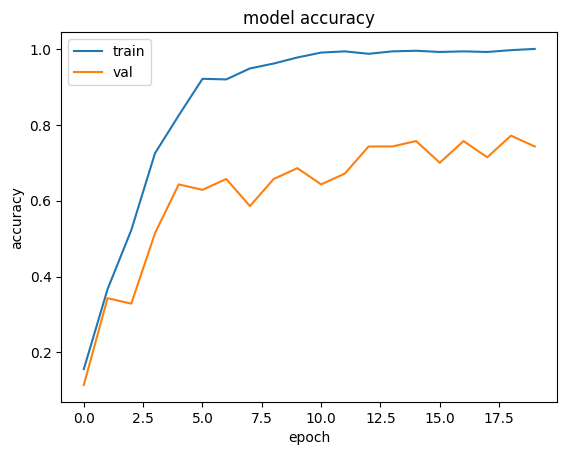

In [38]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

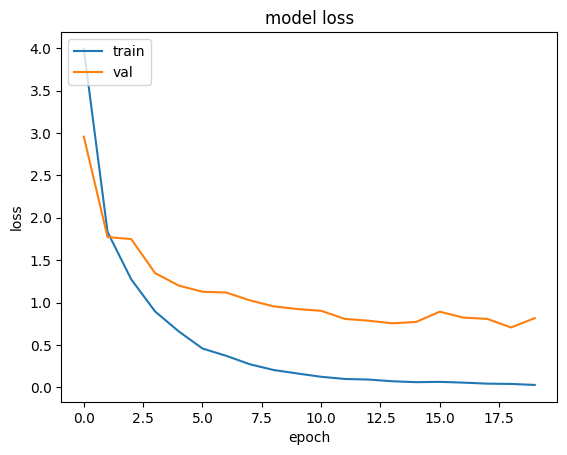

In [39]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [40]:
y_pred = model.predict(X_test)


6/6 [==============================] - 4s 240ms/step


In [41]:
threshold = 0.5  # Set your threshold value
y_pred_binary = (y_pred > threshold).astype(int)


In [42]:
from sklearn.metrics import multilabel_confusion_matrix

# Compute the confusion matrix
confusion_matrix = multilabel_confusion_matrix(y_test, y_pred_binary)
print(confusion_matrix)


[[[141   4]
  [ 16  13]]

 [[150   4]
  [  2  18]]

 [[141   5]
  [  5  23]]

 [[155   2]
  [  6  11]]

 [[146   6]
  [  6  16]]

 [[131   8]
  [  8  27]]

 [[148   3]
  [  7  16]]]


In [43]:
from sklearn.metrics import precision_score, recall_score, f1_score

# List of confusion matrices for all 7 classes
confusion_matrices = [
    [[141, 4], [16, 13]],  # Class 1
    [[150, 4], [2, 18]],   # Class 2
    [[141, 5], [5, 23]],   # Class 3
    [[155, 2], [6, 11]],   # Class 4
    [[146, 6], [6, 16]],   # Class 5
    [[131, 8], [8, 27]],   # Class 6
    [[148, 3], [7, 16]]    # Class 7
]


# Calculate precision, recall, and F1-score for each class
for idx, confusion_matrix in enumerate(confusion_matrices, start=1):
    tn, fp = confusion_matrix[0]
    fn, tp = confusion_matrix[1]

    if tp + fp == 0 and tp + fn == 0:
        # Both precision and recall are 0, so assign F1-score as 0
        f1 = 0
    else:
        precision = tp / (tp + fp) if tp + fp != 0 else 0
        recall = tp / (tp + fn) if tp + fn != 0 else 0
        f1 = 2 * (precision * recall) / (precision + recall) if precision + recall != 0 else 0

    print(f"Class {idx}:")
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)
    print("-----------------------")


Class 1:
Precision: 0.7647058823529411
Recall: 0.4482758620689655
F1-score: 0.5652173913043479
-----------------------
Class 2:
Precision: 0.8181818181818182
Recall: 0.9
F1-score: 0.8571428571428572
-----------------------
Class 3:
Precision: 0.8214285714285714
Recall: 0.8214285714285714
F1-score: 0.8214285714285714
-----------------------
Class 4:
Precision: 0.8461538461538461
Recall: 0.6470588235294118
F1-score: 0.7333333333333334
-----------------------
Class 5:
Precision: 0.7272727272727273
Recall: 0.7272727272727273
F1-score: 0.7272727272727273
-----------------------
Class 6:
Precision: 0.7714285714285715
Recall: 0.7714285714285715
F1-score: 0.7714285714285715
-----------------------
Class 7:
Precision: 0.8421052631578947
Recall: 0.6956521739130435
F1-score: 0.761904761904762
-----------------------


In [44]:
# Lists to store precision, recall, and F1-score for each class
precisions = []
recalls = []
f1_scores = []

# Calculate precision, recall, and F1-score for each class
for idx, confusion_matrix in enumerate(confusion_matrices, start=1):
    tn, fp = confusion_matrix[0]
    fn, tp = confusion_matrix[1]

    # Calculate precision, recall, and F1-score for the current class
    precision = tp / (tp + fp) if tp + fp != 0 else 0
    recall = tp / (tp + fn) if tp + fn != 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if precision + recall != 0 else 0

    # Append the calculated metrics to the lists
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

# Calculate macro-averaged precision, recall, and F1-score
macro_precision = sum(precisions) / len(precisions)
macro_recall = sum(recalls) / len(recalls)
macro_f1 = sum(f1_scores) / len(f1_scores)

print("Macro Precision:", macro_precision)
print("Macro Recall:", macro_recall)
print("Macro F1-score:", macro_f1)


Macro Precision: 0.7987538114251957
Macro Recall: 0.7158738185201844
Macro F1-score: 0.7482468876878815
